## Complex networks 2025 - Fall
### Practice 01 - 2025.09.23.

Introduction to NetworkX, graph visualization, basic metrics and graph models

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Create graphs with networkx

In [ ]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

In [3]:
G.nodes(), list(G.nodes())

(NodeView((1, 2, 3, 4, 5)), [1, 2, 3, 4, 5])

In [4]:
G.add_edge(1, 4) #add an edge
print(list(G.edges()))
G.remove_edge(1, 4) #remove an edge
print(list(G.edges()))

[(1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 5)]
[(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)]


In [5]:
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())

Number of nodes: 5
Number of edges: 5


In [6]:
print(G)

Graph with 5 nodes and 5 edges


## Visualization

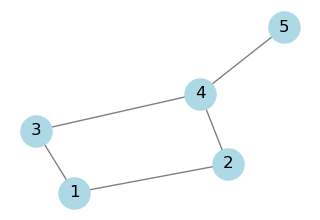

In [22]:
plt.figure(figsize=(3, 2))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)

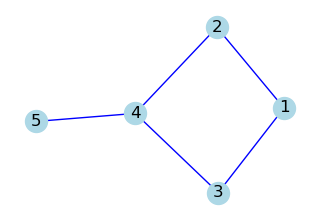

In [17]:
pos = nx.spring_layout(G, k=0.1, iterations=40)
plt.figure(figsize=(3, 2))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='blue', node_size=250)

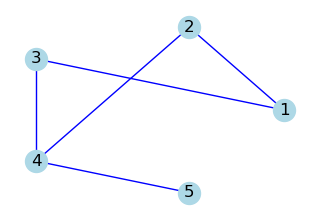

In [20]:
pos = nx.circular_layout(G)
plt.figure(figsize=(3, 2))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='blue', node_size=250)

## Read in and store networks

In [21]:
file = open('iwiw_ego_adjlist.dat', 'r')
lines = file.readlines()
file.close()
for line in lines[0:10]:
	print(line.strip())

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 57 63 47 83 87 90 84 97 85 73 98 95 103 106 114 88 121 48 107 104 74 58 108 59 96 131 132 134 91 92 139 49 75 122 99 130 50 93 51 60 125 133 64 94 115 52 61 109 89 123 145 76 77 110 53 102 140 65 128 116 142 111 66 105 100 67 124 117 118 68 62 69 78 86 144 143 146 54 70 79 141 112 147 148 80 149 71 101 135 55 126 81 56 137 136 129 113 138 82 127 119 150 120 72
1 139 140 54 56
2 106 107 108 134 91 92 99 93 125 94 109 110 128 111 101 135 126 136 113 127 72 3 4 9 16 19 21 23 24 25 27 32 33 34 35 40 41 42 44
3 107 108 91 92 99 51 109 77 110 136 127 72 4 5 8 12 16 19 23 24 27 32 33 34 35 44
4 106 91 92 99 93 109 110 113 120 72 9 12 16 19 23 24 32 33 40 41 42
5 47 61 76 68 78 143 80 82 7 12
6 150 11 13 18 26 29 31 36
7 64 61 65 143 120 72 12
8 107 91 92 125 111 112 136 127 24 35
9 106 107 134 91 92 99 93 125 109 110 111 112 101 135 126 113 127 72 16 19 21 23 24 2

### Task 1: Write a code that read in 'iwiw_ego_edgelist.dat' without using networkx read function.

In [34]:
# Work here
def my_read_edgelist(filename):
    G = nx.Graph()
    file = open(filename, 'r')
    lines = file.readlines()
    file.close()
    for line in lines:
        line = line.replace('{', '').replace('}', '')
        item_list = line.strip().split()
        node_1 = int(item_list[0])
        node_2_list = [int(i) for i in item_list[1:]]
        for node_2 in node_2_list:
            G.add_edge(node_1, node_2)
    return G

Read in edges list and adjacency list with networkx

In [35]:
#load edgelist
G1 = my_read_edgelist('iwiw_ego_edgelist.dat')
#load adjlist
G2 = my_read_edgelist('iwiw_ego_adjlist.dat')
print(G1, G2)

Graph with 151 nodes and 1326 edges Graph with 151 nodes and 1326 edges


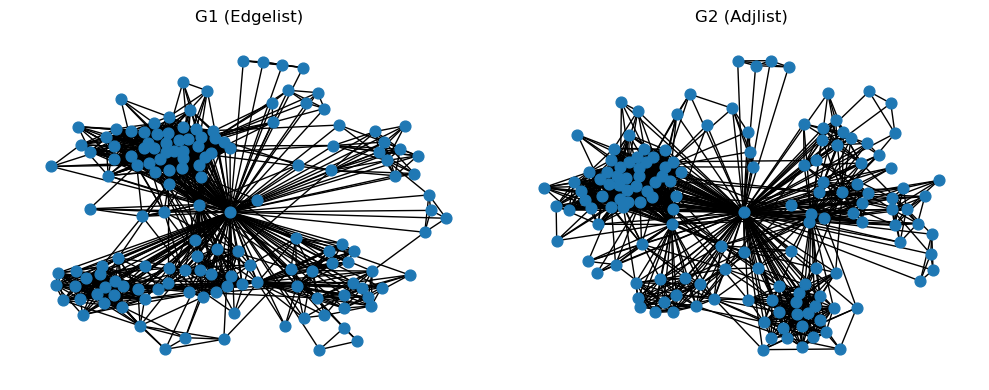

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# First subplot - G1
nx.draw(G1, pos=nx.spring_layout(G1), node_size=60, ax=ax1)
ax1.set_title('G1 (Edgelist)')

# Second subplot - G2
nx.draw(G2, pos=nx.spring_layout(G2), node_size=60, ax=ax2)
ax2.set_title('G2 (Adjlist)')

plt.tight_layout()
plt.show()

Read in a .dot file (https://en.wikipedia.org/wiki/DOT_(graph_description_language) )

In [37]:
file = open('a.dot', 'r')
lines = file.readlines()
for line in lines[:5]:
	print(line.strip())
for line in lines[-5:]:
	print(line.strip())

graph{
0;
1;
2;
3;
40 -- 44;
41 -- 42;
41 -- 44;
42 -- 44;
}


In [38]:
# read in a dot file
G1 = nx.Graph(nx.nx_pydot.read_dot('a.dot'))
print(G1)

Graph with 151 nodes and 1326 edges


### NetworkX is slow, be careful with large networks!
- download combined facebook data: https://snap.stanford.edu/data/ego-Facebook.html

In [39]:
import time
t0 = time.time()
G = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)
t1 = time.time()
print("Time taken to read edgelist:", t1 - t0)

Time taken to read edgelist: 0.38764476776123047


In [40]:
t0 = time.time()
G = my_read_edgelist('facebook_combined.txt')
t1 = time.time()
print("Time taken to read edgelist:", t1 - t0)

Time taken to read edgelist: 0.292370080947876


## Generate simple graphs

### Task 2: Write a code that generates a ER graph with given n and p

In [42]:
import random

def my_ER(N,p):
    edge_list = list(range(N))
    G = nx.Graph()
    for e1 in edge_list:
        for e2 in edge_list:
            if e1 < e2:
                if random.random() < p:
                    G.add_edge(e1, e2)
    return G

Average degree: 9.58


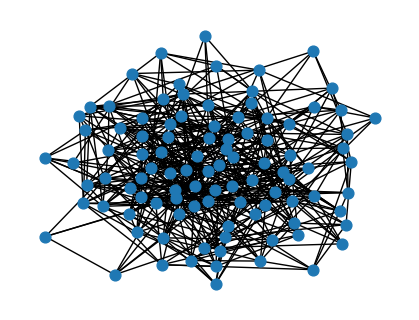

In [50]:
ER = my_ER(100, 0.1)
avg_degree = ER.number_of_edges()*2/ER.number_of_nodes()
print('Average degree:', avg_degree)
plt.figure(figsize=(4, 3))
nx.draw(ER, pos=nx.spring_layout(ER, iterations=100), node_size=60)

NetworkX solutions for ER, WS and Configuration model

In [72]:
# # Erdos-Renyi model
# G_er = nx.erdos_renyi_graph(n=20, p=0.4)
# nx.draw(G_er, with_labels=False, pos=nx.spring_layout(G_er))
# plt.show()

# # Watts-Strogatz model
# G_ws = nx.watts_strogatz_graph(n=15, k=4, p=0.2)
# nx.draw(G_ws, with_labels=False, pos=nx.spring_layout(G_ws))
# plt.show()

# # Configuration model (given a degree sequence)
# degree_seq = [3, 3, 2, 2, 5, 1, 2, 3, 3]
# G_conf = nx.configuration_model(degree_seq)
# nx.draw(G_conf, with_labels=True, pos=nx.spring_layout(G_conf))

## Measures

### Degree distribution

In [60]:
ER.degree()

DegreeView({0: 10, 3: 16, 28: 13, 34: 8, 35: 6, 40: 10, 46: 11, 55: 9, 57: 13, 59: 6, 85: 9, 1: 12, 6: 8, 11: 5, 47: 10, 54: 14, 71: 11, 78: 10, 82: 12, 87: 10, 91: 4, 96: 11, 2: 5, 15: 7, 45: 12, 67: 13, 92: 7, 8: 8, 10: 7, 13: 11, 23: 9, 26: 11, 41: 11, 62: 8, 64: 10, 72: 5, 95: 9, 98: 10, 4: 10, 27: 17, 43: 9, 53: 8, 58: 11, 76: 11, 83: 11, 88: 13, 89: 13, 5: 13, 7: 10, 12: 11, 22: 10, 51: 13, 65: 9, 97: 9, 32: 8, 38: 14, 74: 9, 84: 15, 42: 6, 50: 10, 63: 6, 80: 6, 93: 10, 99: 9, 24: 7, 9: 12, 14: 7, 16: 11, 56: 6, 79: 10, 31: 6, 21: 7, 86: 7, 25: 14, 70: 7, 29: 8, 39: 10, 94: 7, 17: 13, 60: 10, 30: 10, 18: 10, 48: 7, 49: 6, 52: 8, 66: 9, 90: 16, 37: 12, 75: 10, 77: 14, 19: 10, 33: 10, 44: 9, 20: 6, 73: 9, 69: 4, 68: 10, 61: 7, 36: 8, 81: 9})

Average degree: 89.06


Text(0, 0.5, 'P(k)')

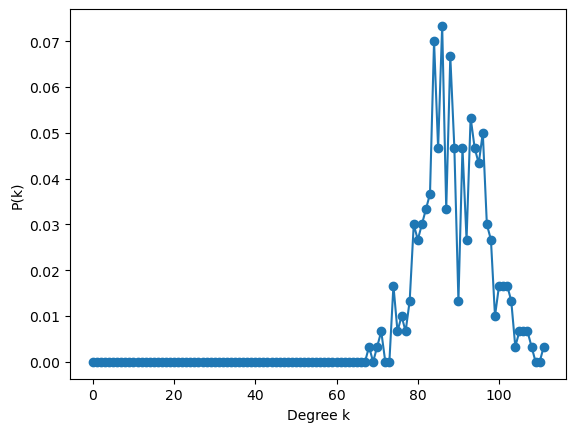

In [61]:
ER = nx.erdos_renyi_graph(n=300, p=0.3)
#degree distribution
degrees = [d for n, d in ER.degree()]
print('Average degree:', np.mean(degrees))
plt.plot(np.bincount(degrees)/sum(np.bincount(degrees)), 'o-')
plt.xlabel('Degree k')
plt.ylabel('P(k)')

### Assortativity

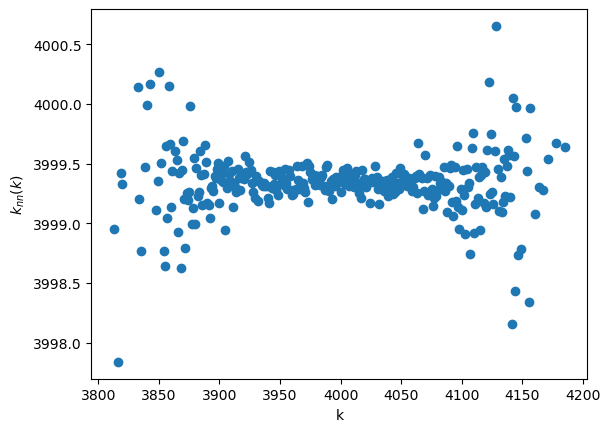

In [62]:
ER = nx.erdos_renyi_graph(n=10000, p=0.4)

knn = nx.average_degree_connectivity(ER)
ks = list(knn.keys())
knn_values = list(knn.values())
plt.plot(ks, knn_values, 'o')
plt.xlabel("k")
plt.ylabel(r"$k_{nn}(k)$")
plt.show()

### Average path length

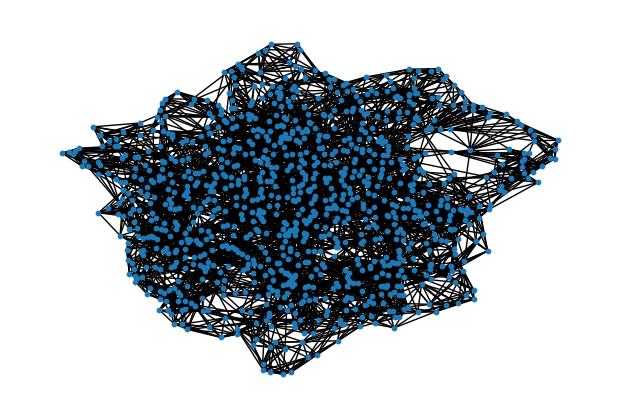

Distance between node 0 and 500: 3


In [64]:
WS = nx.watts_strogatz_graph(n=1000, k=10, p=0.1)
plt.figure(figsize=(6, 4))
nx.draw(WS, with_labels=False, pos=nx.spring_layout(WS), node_size=10)
plt.show()

d = nx.shortest_path_length(WS, source=0, target=500)
print('Distance between node 0 and 500:', d)

In [65]:
t0_our = time.time()
avg_path_length_2 = 0
for i in range(WS.number_of_nodes()):
	for j in range(i+1, WS.number_of_nodes()):
		avg_path_length_2 += nx.shortest_path_length(WS, source=i, target=j)
avg_path_length_2 /= (WS.number_of_nodes() * (WS.number_of_nodes() - 1)) / 2
t1_our = time.time()
print("Time taken (our method):", t1_our - t0_our)
print('Average path length (our method):', avg_path_length_2)

t0_nx = time.time()
avg_path_length = nx.average_shortest_path_length(WS)
t1_nx = time.time()
print("Time taken (NetworkX):", t1_nx - t0_nx)
print('Average path length (NetworkX):', avg_path_length)


Time taken (our method): 29.010963201522827
Average path length (our method): 4.510642642642643
Time taken (NetworkX): 0.9228684902191162
Average path length (NetworkX): 4.510642642642643


### Clustering coefficient

In [70]:
ER = nx.erdos_renyi_graph(n=1000, p=0.2)
clustering_coeffs = nx.clustering(ER)

In [71]:
mean = np.mean(list(clustering_coeffs.values()))
print('Mean clustering coefficient (our method):', mean)

# For your clustering_coeffs dictionary
max_node = max(clustering_coeffs, key=clustering_coeffs.get)
min_node = min(clustering_coeffs, key=clustering_coeffs.get)

max_value = clustering_coeffs[max_node]
min_value = clustering_coeffs[min_node]

print(f"Max clustering coefficient: Node {max_node} = {max_value}")
print(f"Min clustering coefficient: Node {min_node} = {min_value}")

Mean clustering coefficient (our method): 0.1999631289525564
Max clustering coefficient: Node 631 = 0.20821114369501467
Min clustering coefficient: Node 246 = 0.19027841870481466


### Task 3: Compare the above measures for ER and Configuration model (from the ER degree sequence)

In [92]:
def plot_graph(G, title, pos_type="spring", multi=False):
    # degree distribution
    degrees = [d for n, d in G.degree()]
    knn = nx.average_degree_connectivity(G)
    ks = list(knn.keys())
    knn_values = list(knn.values())

    # path lengths
    target = G.number_of_nodes()//2
    d = nx.shortest_path_length(G, source=0, target=target)
    avg_path_length = nx.average_shortest_path_length(G)

    # clustering
    if not multi:
        clustering_coeffs = nx.clustering(G)
        c_mean = np.mean(list(clustering_coeffs.values()))
        max_node = max(clustering_coeffs, key=clustering_coeffs.get)
        min_node = min(clustering_coeffs, key=clustering_coeffs.get)
        max_value = clustering_coeffs[max_node]
        min_value = clustering_coeffs[min_node]

    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    # First subplot - Network visualization and measures
    if pos_type == "spring":
        pos = nx.spring_layout(G)
    elif pos_type == "circular":
        pos = nx.circular_layout(G)
    else: # default layout
        pos = nx.spring_layout(G)
    nx.draw(G, with_labels=False, pos=pos, node_size=10, ax=ax1)
    subtitle = f'Average degree: {np.mean(degrees)}\nDistance(0,{target}): {d}\nAverage path length: {avg_path_length}\n'
    if not multi:
        subtitle += f'Mean clustering coeff.: {c_mean:.3f}, Max: {max_value:.3f}, Min: {min_value:.3f}'
    ax1.set_title(subtitle)

    # Second subplot - Degree distribution
    ax2.plot(np.bincount(degrees)/sum(np.bincount(degrees)), 'o-')
    ax2.set_xlabel('Degree k')
    ax2.set_ylabel('P(k)')
    ax2.set_title('Degree Distribution')

    # Third subplot - Average nearest neighbor degree
    ax3.plot(ks, knn_values, 'o')
    ax3.set_xlabel('Degree k')
    ax3.set_ylabel(r"$k_{nn}(k)$")
    ax3.set_title('Average Nearest Neighbor Degree')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


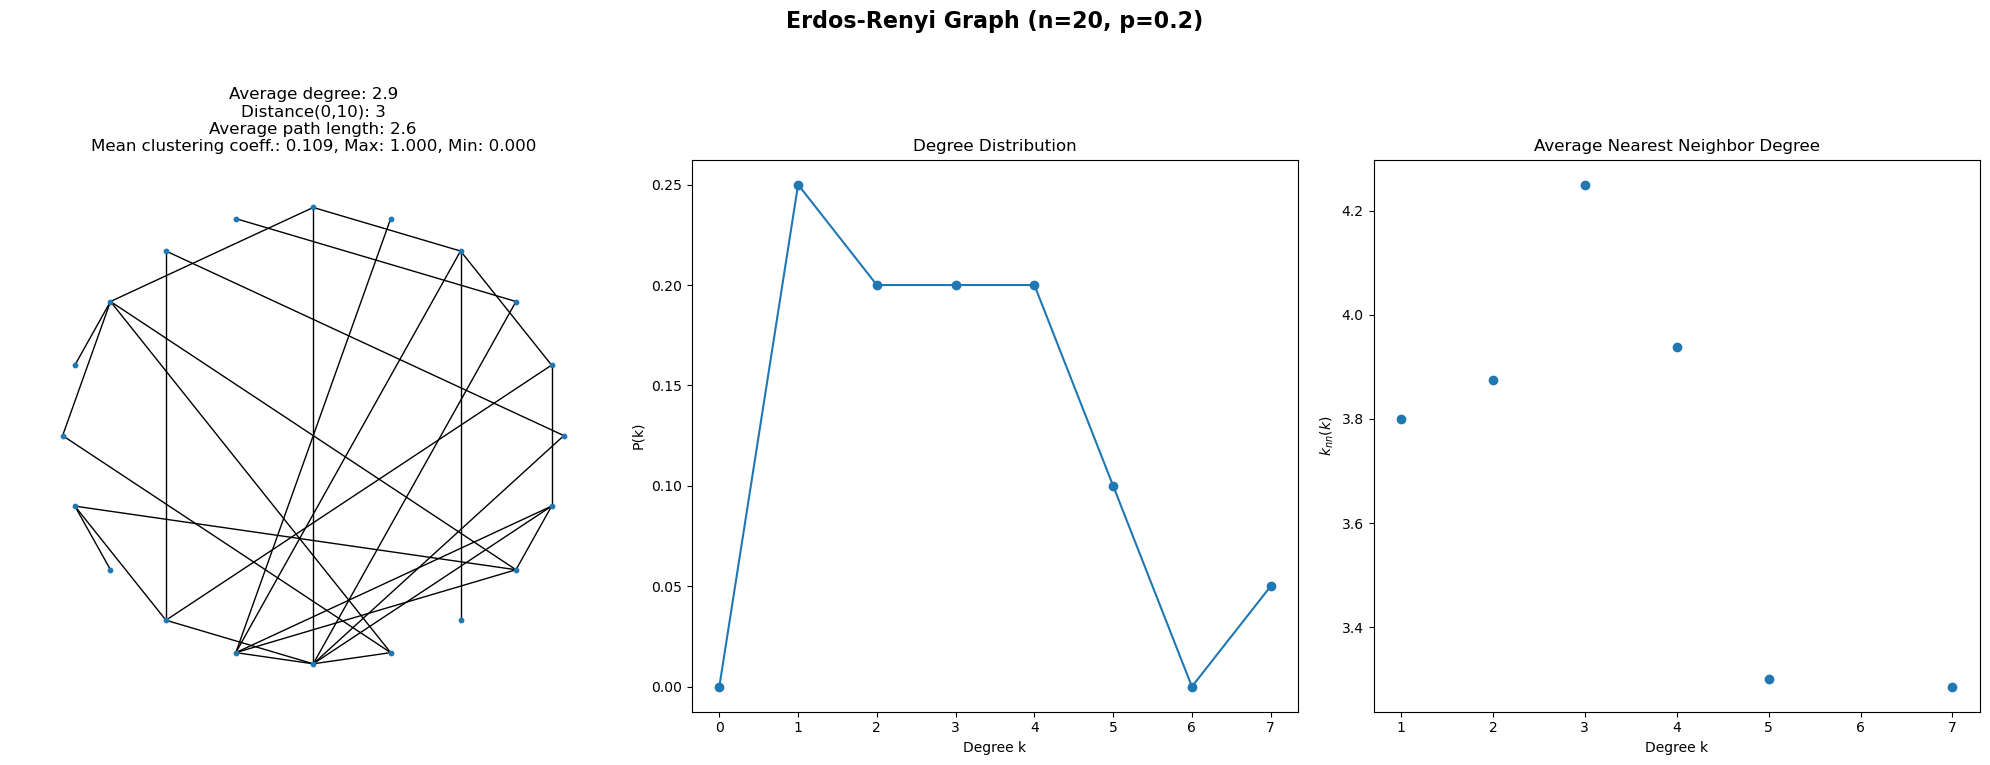

In [97]:
################### Erdos-Renyi model ###################
n = 20
p = 0.2
G_er = nx.erdos_renyi_graph(n=n, p=p)
title = f'Erdos-Renyi Graph (n={n}, p={p})'
plot_graph(G_er, title, "circular")

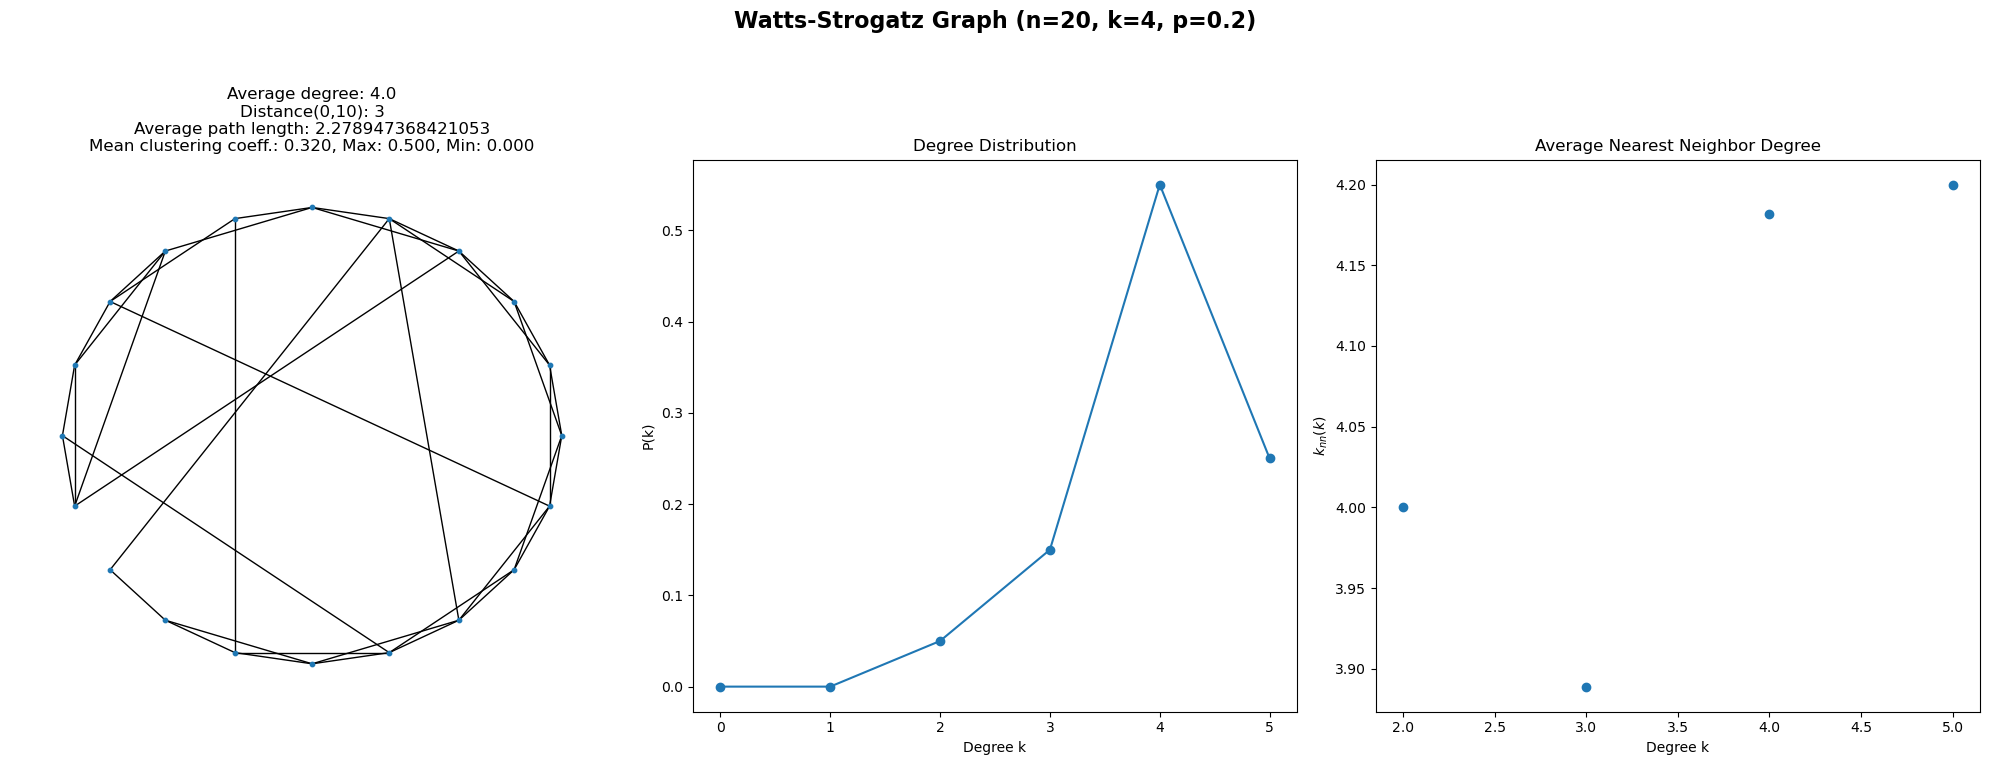

In [111]:
################### Watts-Strogatz model ###################
n = 20
k = 4
p = 0.2
G_ws = nx.watts_strogatz_graph(n=n, k=k, p=p)
title = f'Watts-Strogatz Graph (n={n}, k={k}, p={p})'
plot_graph(G_ws, title, "circular")

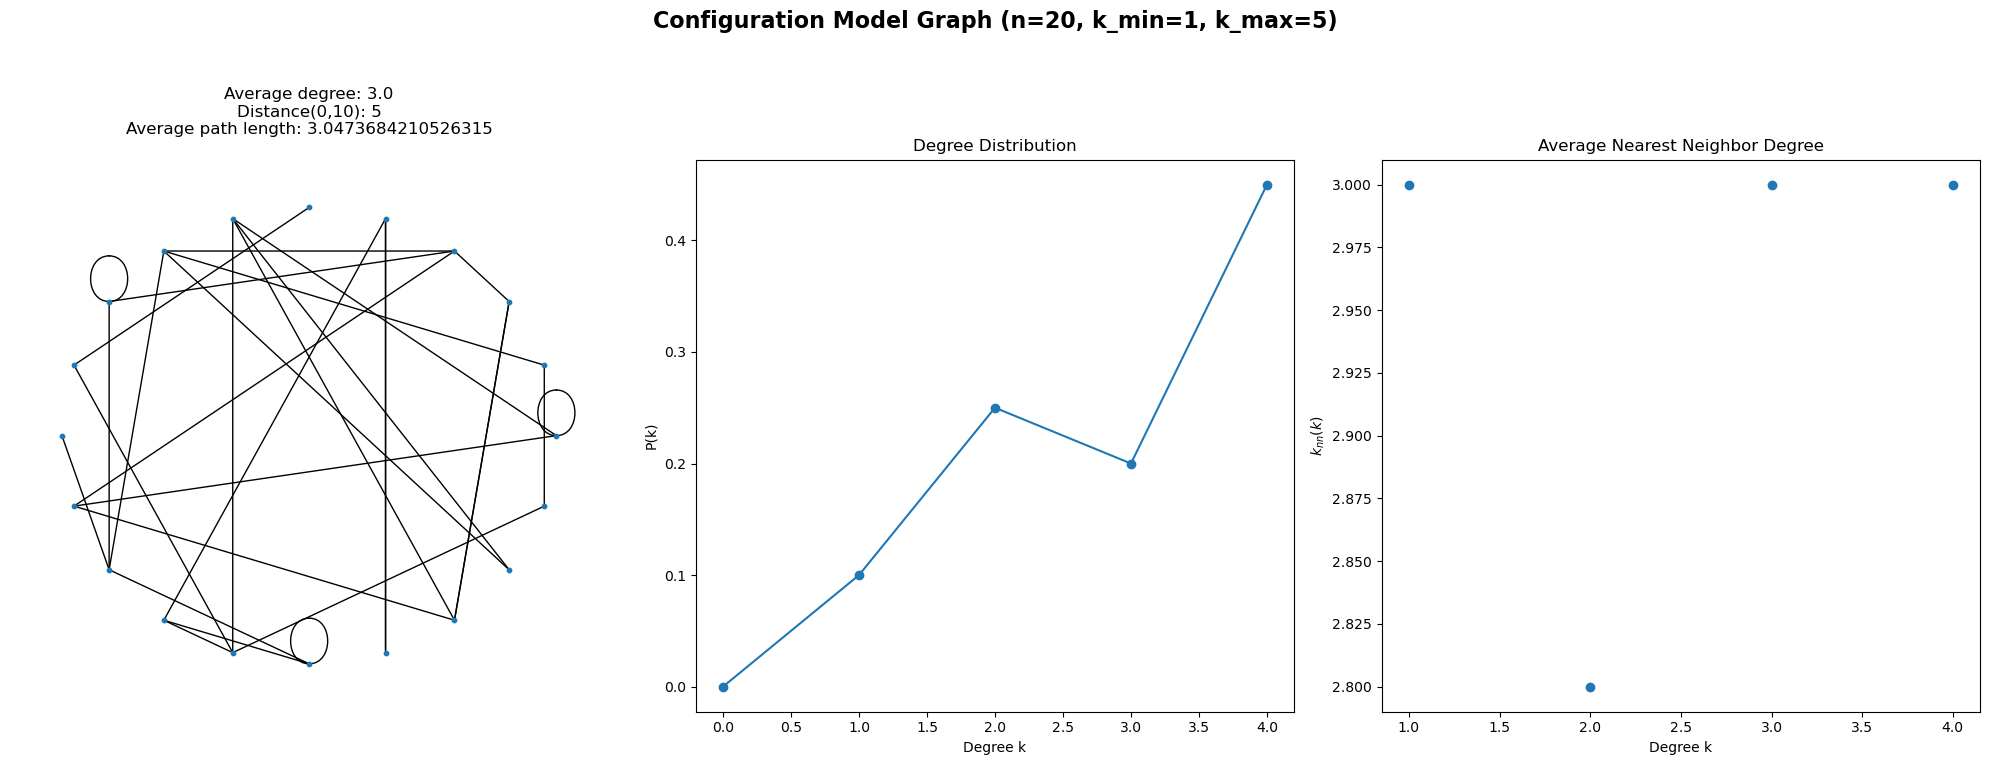

In [109]:
################### Configuration model ###################
n = 20
k_max = 5
k_min = 1
degree_seq = np.random.randint(k_min, k_max, size=n)
if np.sum(degree_seq) % 2 != 0:
    degree_seq[0] += 1  # Make sum even if it's odd
G_conf = nx.configuration_model(degree_seq)
title = f'Configuration Model Graph (n={n}, k_min={k_min}, k_max={k_max})'
plot_graph(G_conf, title, "circular", multi=True)

## Homework: Reproduce the plot from lecture 2 slide 32 for Watts-Strogatz model
- Measure the clustering coefficient and average path length for different p and N (Try to predict and observe what happens as $N \to \infty$)
- For the clustering coefficient use your own implementation (not the networkx function)